In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import mlab
import scipy.signal as signal
from scipy import stats
import pandas as pd
from scipy import linalg
import os

%matplotlib inline 
from matplotlib import pyplot as plt
import matplotlib.cm as cm 
from math import pi 
!pip install windrose openpyxl
from windrose import WindroseAxes

*MLML Shore Station Data>Moss_Landing>netcdf*
https://drive.google.com/drive/u/3/folders/1kHGUe0LtATtH5veMkt-f35pgTuz2AGWZ

In [2]:
local_dataset_2016='moss_landing_2016.nc'
local_dataset_2017 = 'moss_landing_2017.nc'
local_dataset_2018='moss_landing_2018.nc'
local_dataset_2019='moss_landing_2019.nc'
local_dataset_2021='moss_landing_2021.nc'

In [3]:
ds2016= xr.open_dataset(local_dataset_2016)
ds2017=xr.open_dataset(local_dataset_2017)
ds2018=xr.open_dataset(local_dataset_2018)
ds2019=xr.open_dataset(local_dataset_2019)
ds2021=xr.open_dataset(local_dataset_2021)

In [4]:
df16=ds2016.to_dataframe()
df17=ds2017.to_dataframe()
df18=ds2018.to_dataframe()
df19=ds2019.to_dataframe()
df21=ds2021.to_dataframe()

Text(0.5, 0, 'Year-Month')

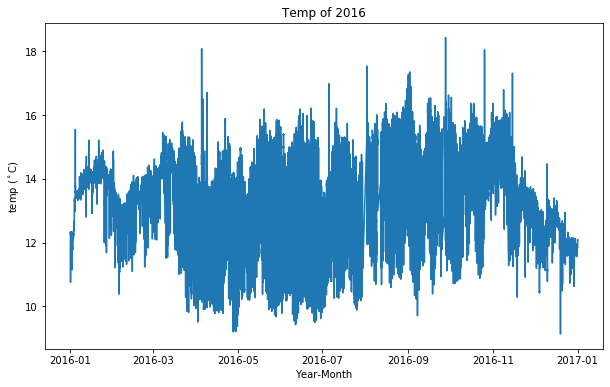

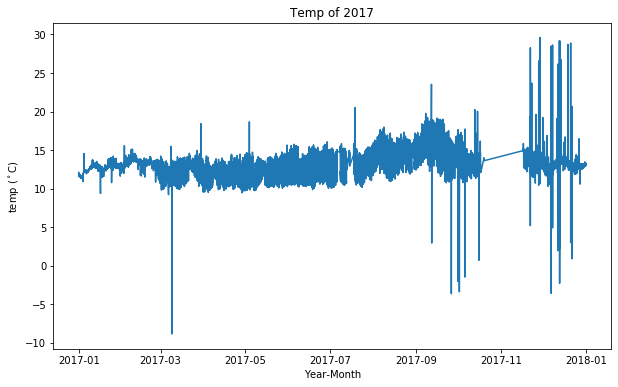

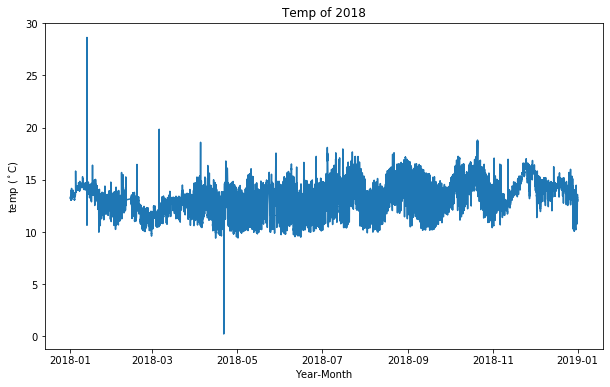

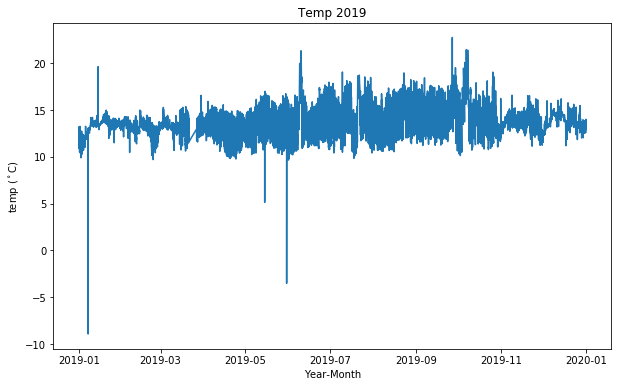

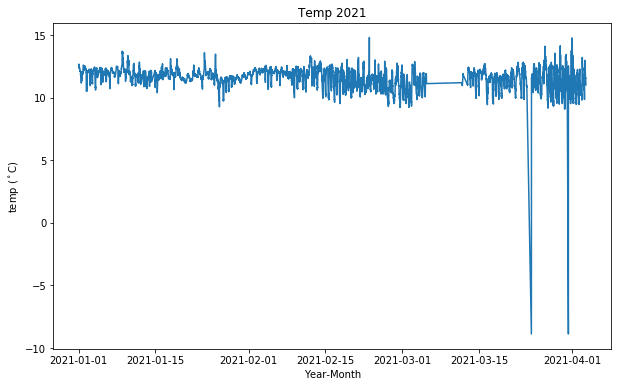

In [5]:
#Temp 2016
plt.figure(figsize=(10,6))
plt.plot(df16.index,df16['temp'])
plt.title('Temp of 2016')
plt.ylabel('temp ($^\circ$C)')
plt.xlabel('Year-Month')

#Temp 2017
plt.figure(figsize=(10,6))
plt.plot(df17.index,df17['temp'])
plt.title('Temp of 2017')
plt.ylabel('temp ($^\circ$C)')
plt.xlabel('Year-Month')


#Temp 2018
plt.figure(figsize=(10,6))
plt.plot(df18.index,df18['temp'])
plt.title('Temp of 2018')
plt.ylabel('temp ($^\circ$C)')
plt.xlabel('Year-Month')

#Temp 2019
plt.figure(figsize=(10,6))
plt.plot(df19.index,df19['temp'])
plt.title('Temp 2019')
plt.ylabel('temp ($^\circ$C)')
plt.xlabel('Year-Month')

#Temp 2021
plt.figure(figsize=(10,6))
plt.plot(df21.index,df21['temp'])
plt.title('Temp 2021')
plt.ylabel('temp ($^\circ$C)')
plt.xlabel('Year-Month')

Text(0.5, 0, 'Year-Month')

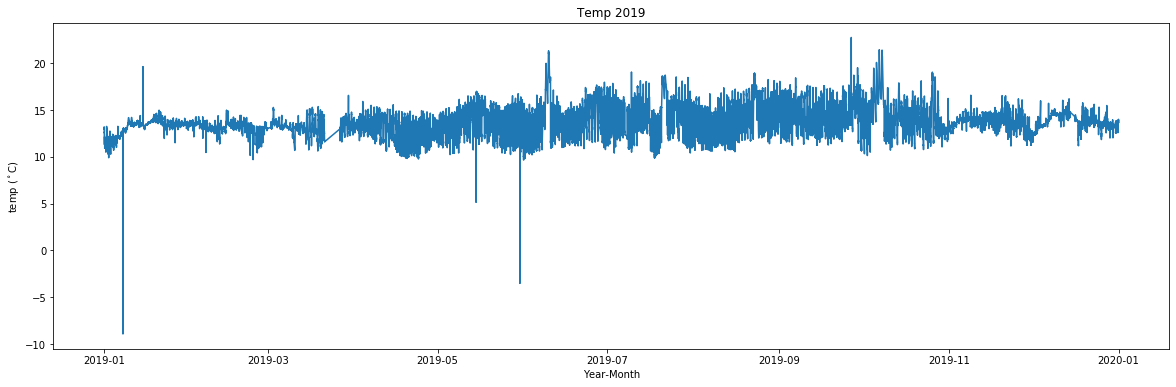

In [6]:
plt.figure(figsize=(20,6))
plt.plot(df19.index,df19['temp'])
plt.title('Temp 2019')
plt.ylabel('temp ($^\circ$C)')
plt.xlabel('Year-Month')

In [7]:
df19=ds2019.to_dataframe()

#enter a number here for how many degrees difference you want to avoid, i.e. 5 for plus or minus 5 degrees C
spikesize = .5

#this is where you define your rolling mean. the window is how many days you're averaging over so I'm just putting 7 as a default for week here
rollmean = df19['temp'].rolling(window=7, min_periods=1).mean()

#also need the standard deviation so we can make a flagged column (to tell us where the spikes are)
rollstd = df19['temp'].rolling(window=7, min_periods=1).std()

#making the spike column..
df19['spikeystuff'] = (df19['temp'] - rollmean).abs() > spikesize * rollstd

#so that we can copy the dataframe but now the spike stuff **should** be gone
newdf19 = df19[df19['spikeystuff'] == False]

In [8]:
# newdf19

(737041.7512534722, 737443.2394641204)

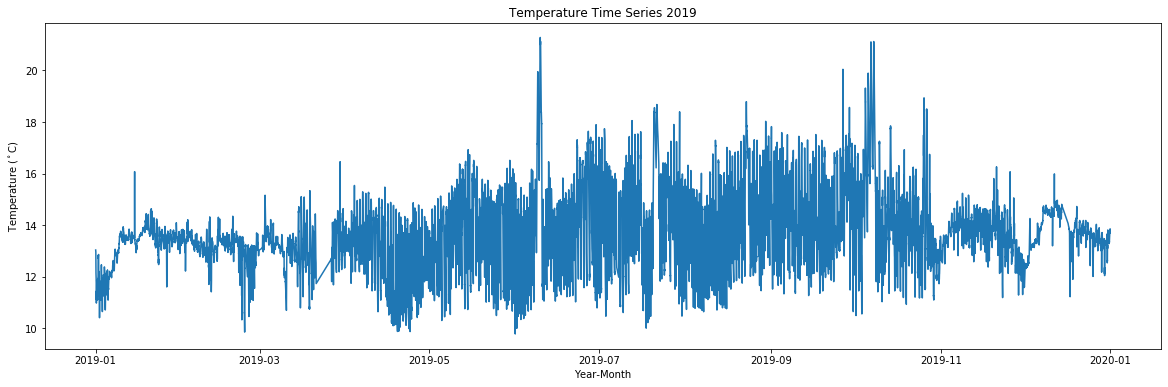

In [9]:
# new Temp 2019
plt.figure(figsize=(20,6))
plt.plot(newdf19.index,newdf19['temp'])
plt.title('Temperature Time Series 2019')
plt.ylabel('Temperature ($^\circ$C)')
plt.xlabel('Year-Month')
plt.xlim()

Text(0.5, 0, 'Year-Month')

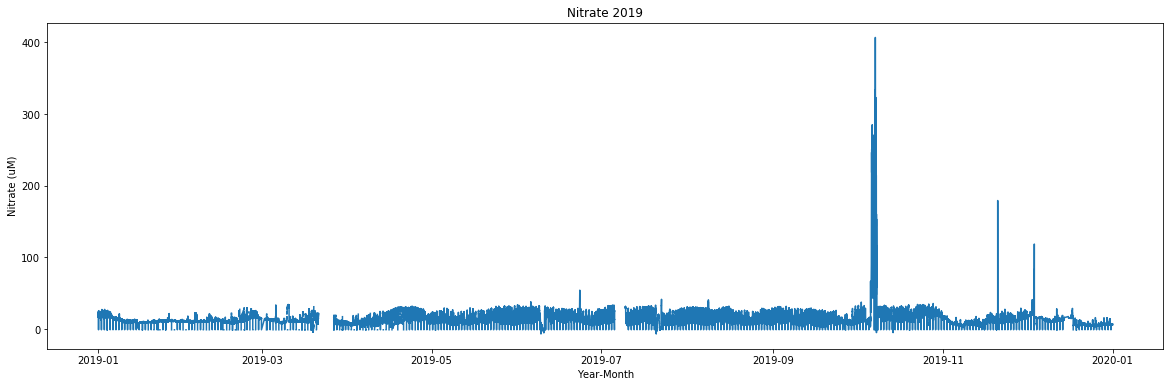

In [10]:

#Nitrate 2019
plt.figure(figsize=(20,6))
plt.plot(df19.index,df19['nitrate'])
plt.title('Nitrate 2019')
plt.ylabel('Nitrate (uM)')
plt.xlabel('Year-Month')

In [11]:
df19=ds2019.to_dataframe()

#enter a number here for how many degrees difference you want to avoid, i.e. 5 for plus or minus 5 degrees C
spikesize = 0.1

#this is where you define your rolling mean. the window is how many days you're averaging over so I'm just putting 7 as a default for week here
rollmean = df19['nitrate'].rolling(window=7, min_periods=1).mean()

#also need the standard deviation so we can make a flagged column (to tell us where the spikes are)
rollstd = df19['nitrate'].rolling(window=7, min_periods=1).std()

#making the spike column..
df19['spikeystuff'] = (df19['nitrate'] - rollmean).abs() > spikesize * rollstd

#so that we can copy the dataframe but now the spike stuff **should** be gone
newdf19 = df19[df19['spikeystuff'] == False]

In [12]:
newdf19

,temp,temp_flg,cond,cond_flg,sal,sal_flg,fluor,fluor_flg,otemp,otemp_flg,...,ph,ph_flg,co2,co2_flg,nitrate,nitrogen,nitrate_flg,lon,lat,spikeystuff
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:01:02,13.036344,1.0,0.918493,1.0,33.492573,1.0,0.949447,1.0,13.22,1.0,...,7.742592,4.0,445.222594,1.0,17.71,0.2480,1.0,-121.7915,36.8025,False
2019-01-01 01:31:02,12.627099,1.0,0.911989,1.0,33.590369,1.0,0.920509,1.0,12.78,1.0,...,7.714224,4.0,484.144783,1.0,20.06,0.2810,1.0,-121.7915,36.8025,False
2019-01-01 02:16:02,12.137272,1.0,0.902037,1.0,33.618399,1.0,0.872280,1.0,12.26,1.0,...,7.711072,4.0,488.069710,1.0,20.12,0.2818,1.0,-121.7915,36.8025,False
2019-01-01 02:41:02,12.134971,1.0,0.901988,1.0,33.618401,1.0,0.891571,1.0,12.22,1.0,...,7.707920,4.0,NaN,4.0,NaN,NaN,4.0,-121.7915,36.8025,False
2019-01-01 06:01:02,10.922771,1.0,0.877661,1.0,33.696122,1.0,0.881926,1.0,10.99,1.0,...,7.679552,4.0,569.075836,1.0,24.56,0.3441,1.0,-121.7915,36.8025,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 22:05:37,13.826303,1.0,0.919076,1.0,32.830258,1.0,0.804758,1.0,13.42,1.0,...,8.001000,1.0,1037.014317,1.0,6.01,0.0841,1.0,-121.7915,36.8025,False
2019-12-31 22:10:33,13.829677,1.0,0.919170,1.0,32.831119,1.0,0.814404,1.0,13.41,1.0,...,8.001000,1.0,1017.351204,1.0,5.96,0.0835,1.0,-121.7915,36.8025,False
2019-12-31 23:00:47,13.812805,1.0,0.918723,1.0,32.827748,1.0,0.824050,1.0,13.52,1.0,...,8.005500,1.0,NaN,4.0,NaN,NaN,4.0,-121.7915,36.8025,False


(737041.7517748842, 737443.2285144676)

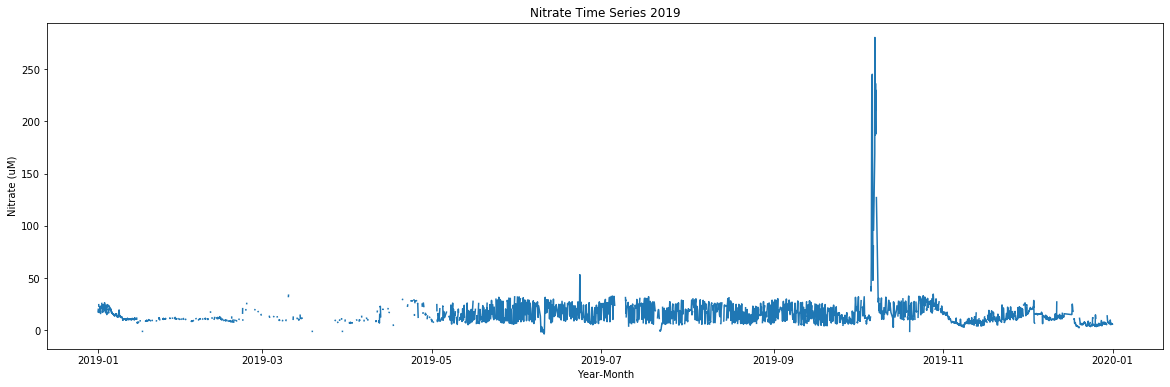

In [13]:
#new nitrate 2019
plt.figure(figsize=(20,6))
plt.plot(newdf19.index,newdf19['nitrate'])
plt.title('Nitrate Time Series 2019')
plt.ylabel('Nitrate (uM)')
plt.xlabel('Year-Month')
plt.xlim()

In [14]:
good_nitrate_2019_subset=newdf19['nitrate'] 

In [15]:
good_nitrate_2019_subset

time
2019-01-01 00:01:02    17.71
2019-01-01 01:31:02    20.06
2019-01-01 02:16:02    20.12
2019-01-01 02:41:02      NaN
2019-01-01 06:01:02    24.56
                       ...  
2019-12-31 22:05:37     6.01
2019-12-31 22:10:33     5.96
2019-12-31 23:00:47      NaN
2019-12-31 23:05:51      NaN
2019-12-31 23:30:35     6.53
Name: nitrate, Length: 13870, dtype: float64

In [16]:
dates_applied_good_nitrate_2019_subset=good_nitrate_2019_subset['2019-06-12':'2019-06-20']

In [17]:
dates_applied_good_nitrate_2019_subset

time
2019-06-12 00:13:17    21.31
2019-06-12 00:28:17    21.17
2019-06-12 00:33:17    21.14
2019-06-12 01:08:17    21.06
2019-06-12 03:33:17    22.84
                       ...  
2019-06-20 16:28:14    13.53
2019-06-20 16:58:13    13.19
2019-06-20 17:28:13    12.61
2019-06-20 20:58:14    23.07
2019-06-20 21:28:14    23.52
Name: nitrate, Length: 103, dtype: float64

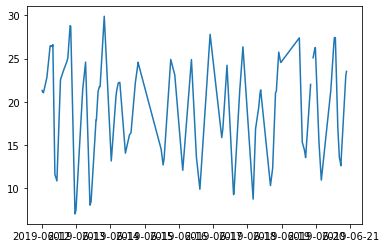

In [18]:
plt.plot(dates_applied_good_nitrate_2019_subset)

In [19]:
nitrate_good_sub=newdf19['2019-06-12':'2019-06-20']

In [20]:
nitrate_good_sub

,temp,temp_flg,cond,cond_flg,sal,sal_flg,fluor,fluor_flg,otemp,otemp_flg,...,ph,ph_flg,co2,co2_flg,nitrate,nitrogen,nitrate_flg,lon,lat,spikeystuff
time,,,,,,,,,,,,,,,,,,,,,
2019-06-12 00:13:17,13.198592,1.0,0.916135,1.0,33.255627,1.0,1.344929,1.0,13.00,1.0,...,7.689008,4.0,815.255960,1.0,21.31,0.2985,1.0,-121.7915,36.8025,False
2019-06-12 00:28:17,13.279367,1.0,0.917877,1.0,33.255370,1.0,1.383513,1.0,13.08,1.0,...,7.689008,4.0,773.062998,1.0,21.17,0.2966,1.0,-121.7915,36.8025,False
2019-06-12 00:33:17,13.315050,1.0,0.918583,1.0,33.252688,1.0,1.344929,1.0,13.10,1.0,...,7.685856,4.0,774.698384,1.0,21.14,0.2960,1.0,-121.7915,36.8025,False
2019-06-12 01:08:17,13.382970,1.0,0.919925,1.0,33.247475,1.0,1.422096,1.0,13.13,1.0,...,7.670096,4.0,790.051774,1.0,21.06,0.2950,1.0,-121.7915,36.8025,False
2019-06-12 03:33:17,12.742036,1.0,0.907001,1.0,33.285437,1.0,1.084490,1.0,12.47,1.0,...,7.591296,4.0,814.928882,1.0,22.84,0.3199,1.0,-121.7915,36.8025,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-20 16:28:14,14.731757,1.0,0.943255,1.0,33.011770,1.0,1.547493,1.0,14.34,1.0,...,7.417936,4.0,660.657458,1.0,13.53,0.1895,1.0,-121.7915,36.8025,False
2019-06-20 16:58:13,14.750088,1.0,0.943231,1.0,32.995294,1.0,1.547493,3.0,14.34,1.0,...,7.440000,4.0,636.056121,1.0,13.19,0.1847,1.0,-121.7915,36.8025,False
2019-06-20 17:28:13,14.940623,1.0,0.946927,1.0,32.977939,1.0,1.586077,1.0,14.51,1.0,...,7.462064,4.0,607.452897,1.0,12.61,0.1766,1.0,-121.7915,36.8025,False


**Note:No nitrate sensor was in the shore lab at this time, so no data available for nitrate between 2016 and 2017**

Text(0.5, 0, 'Year-Month')

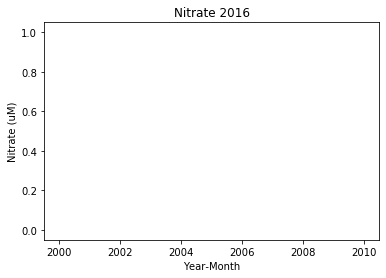

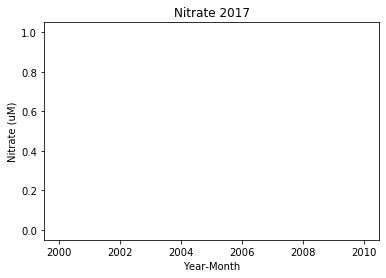

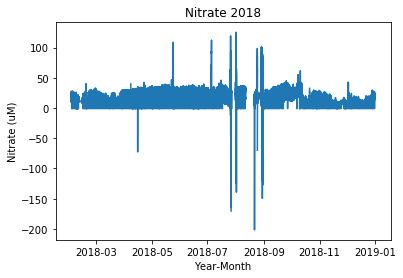

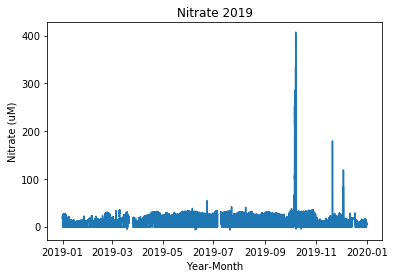

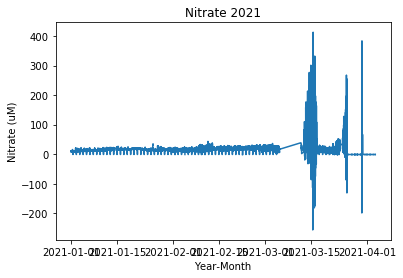

In [21]:
#Nitrate 2016
plt.figure()
plt.plot(df16.index,df16['nitrate'])
plt.title('Nitrate 2016')
plt.ylabel('Nitrate (uM)')
plt.xlabel('Year-Month')

#Nitrate 2017
plt.figure()
plt.plot(df17.index,df17['nitrate'])
plt.title('Nitrate 2017')
plt.ylabel('Nitrate (uM)')
plt.xlabel('Year-Month')


#Nitrate 2018
plt.figure()
plt.plot(df18.index,df18['nitrate'])
plt.title('Nitrate 2018')
plt.ylabel('Nitrate (uM)')
plt.xlabel('Year-Month')

#Nitrate 2019
plt.figure()
plt.plot(df19.index,df19['nitrate'])
plt.title('Nitrate 2019')
plt.ylabel('Nitrate (uM)')
plt.xlabel('Year-Month')

#Nitrate 2021
plt.figure()
plt.plot(df21.index,df21['nitrate'])
plt.title('Nitrate 2021')
plt.ylabel('Nitrate (uM)')
plt.xlabel('Year-Month')

Text(0.5, 0, 'Year-Month')

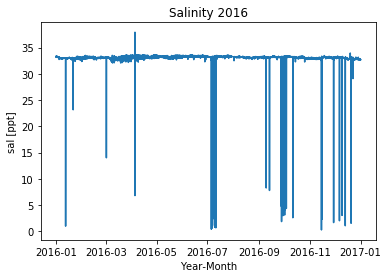

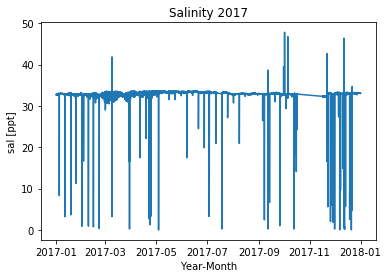

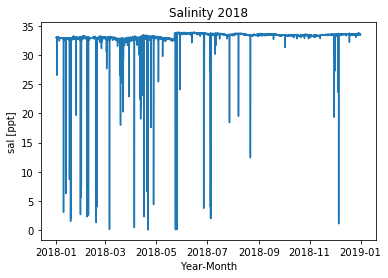

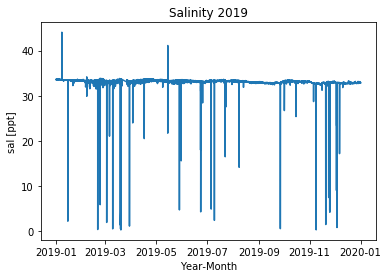

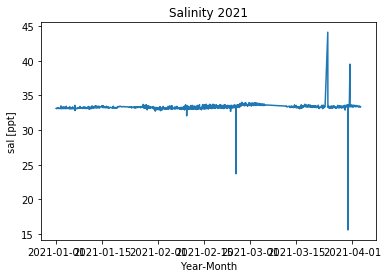

In [22]:
#Salinity 2016
plt.figure()
plt.plot(df16.index,df16['sal'])
plt.title('Salinity 2016')
plt.ylabel('sal [ppt]')
plt.xlabel('Year-Month')

#Salinity 2017
plt.figure()
plt.plot(df17.index,df17['sal'])
plt.title('Salinity 2017')
plt.ylabel('sal [ppt]')
plt.xlabel('Year-Month')


#Salinity 2018
plt.figure()
plt.plot(df18.index,df18['sal'])
plt.title('Salinity 2018')
plt.ylabel('sal [ppt]')
plt.xlabel('Year-Month')

#Salinity 2019
plt.figure()
plt.plot(df19.index,df19['sal'])
plt.title('Salinity 2019')
plt.ylabel('sal [ppt]')
plt.xlabel('Year-Month')

#Salinity 2021
plt.figure()
plt.plot(df21.index,df21['sal'])
plt.title('Salinity 2021')
plt.ylabel('sal [ppt]')
plt.xlabel('Year-Month')

Text(0.5, 0, 'Year-Month')

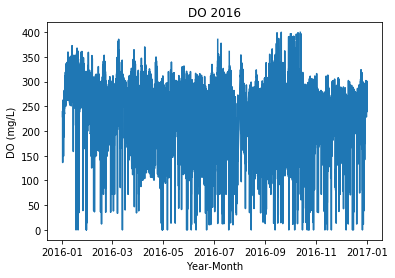

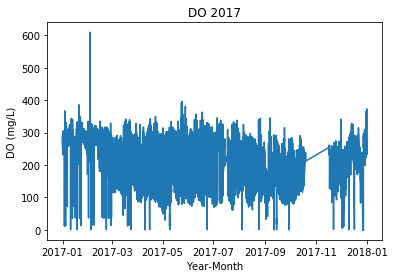

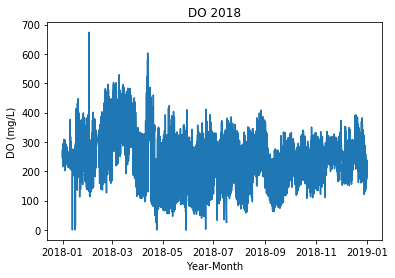

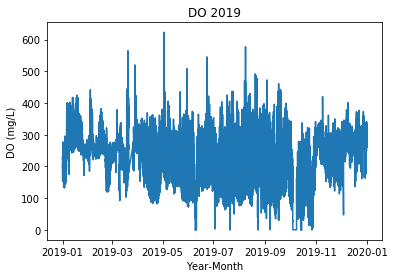

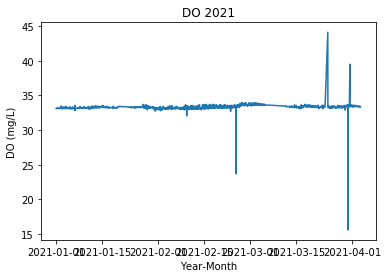

In [23]:
#DO 2016
plt.figure()
plt.plot(df16.index,df16['do2'])
plt.title('DO 2016')
plt.ylabel('DO (mg/L)')
plt.xlabel('Year-Month')

#DO  2017
plt.figure()
plt.plot(df17.index,df17['do2'])
plt.title('DO 2017')
plt.ylabel('DO (mg/L)')
plt.xlabel('Year-Month')


#DO  2018
plt.figure()
plt.plot(df18.index,df18['do2'])
plt.title('DO 2018')
plt.ylabel('DO (mg/L)')
plt.xlabel('Year-Month')

#DO 2019
plt.figure()
plt.plot(df19.index,df19['do2'])
plt.title('DO 2019')
plt.ylabel('DO (mg/L)')
plt.xlabel('Year-Month')

#DO 2021
plt.figure()
plt.plot(df21.index,df21['sal'])
plt.title('DO 2021')
plt.ylabel('DO (mg/L)')
plt.xlabel('Year-Month')

Text(0.5, 0, 'Year-Month')

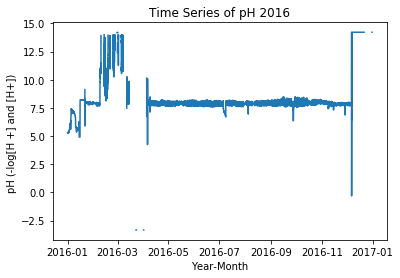

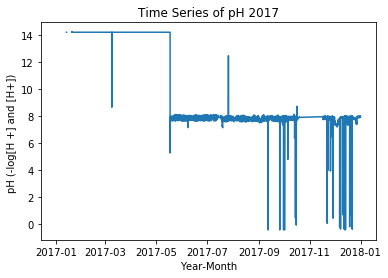

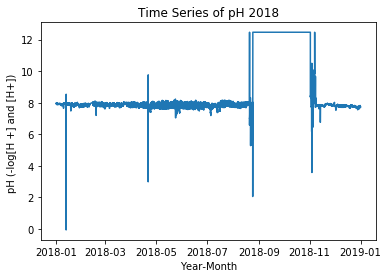

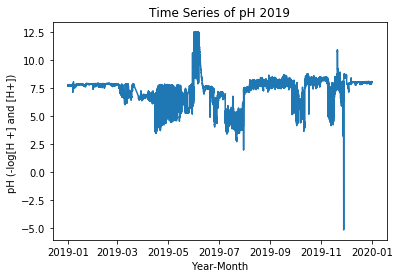

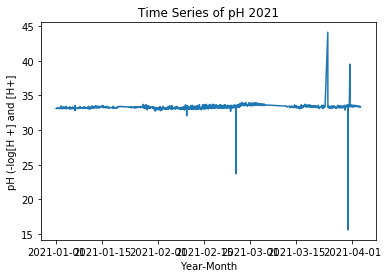

In [24]:
#pH 2016
plt.figure()
plt.plot(df16.index,df16['ph']) 
plt.title('Time Series of pH 2016')
plt.ylabel('pH (-log[H +] and [H+]) ') 
plt.xlabel('Year-Month')

#pH 2017
plt.figure()
plt.plot(df17.index,df17['ph']) 
plt.title('Time Series of pH 2017')
plt.ylabel('pH (-log[H +] and [H+]) ') 
plt.xlabel('Year-Month')

#pH 2018
plt.figure()
plt.plot(df18.index,df18['ph']) 
plt.title('Time Series of pH 2018')
plt.ylabel('pH (-log[H +] and [H+]) ') 
plt.xlabel('Year-Month')

#pH 2019
plt.figure()
plt.plot(df19.index,df19['ph']) 
plt.title('Time Series of pH 2019')
plt.ylabel('pH (-log[H +] and [H+]) ') 
plt.xlabel('Year-Month')

#pH 2021
plt.figure()
plt.plot(df21.index,df21['sal'])
plt.title('Time Series of pH 2021')
plt.ylabel('pH (-log[H +] and [H+]') 
plt.xlabel('Year-Month')

Text(0.5, 0, 'Year-Month')

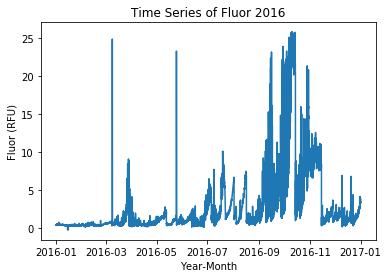

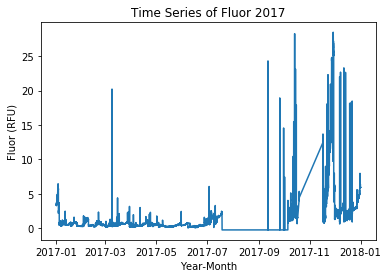

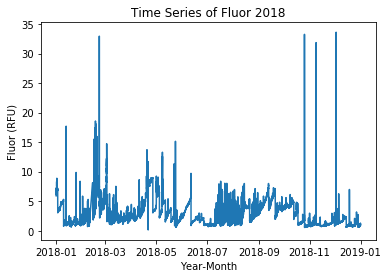

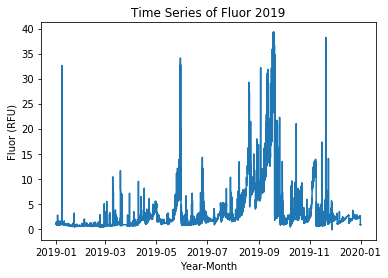

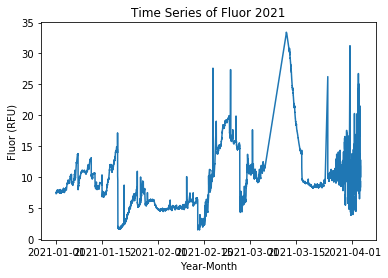

In [25]:
#Fluorescence
plt.figure()
plt.plot(df16.index,df16['fluor']) 
plt.title('Time Series of Fluor 2016')
plt.ylabel('Fluor (RFU)') 
plt.xlabel('Year-Month')

#Fluorescence
plt.figure()
plt.plot(df17.index,df17['fluor']) 
plt.title('Time Series of Fluor 2017')
plt.ylabel('Fluor (RFU)') 
plt.xlabel('Year-Month')

#Fluorescence
plt.figure()
plt.plot(df18.index,df18['fluor']) 
plt.title('Time Series of Fluor 2018')
plt.ylabel('Fluor (RFU)') 
plt.xlabel('Year-Month')

#Fluorescence
plt.figure()
plt.plot(df19.index,df19['fluor']) 
plt.title('Time Series of Fluor 2019')
plt.ylabel('Fluor (RFU)') 
plt.xlabel('Year-Month')

#Fluorescence
plt.figure()
plt.plot(df21.index,df21['fluor']) 
plt.title('Time Series of Fluor 2021')
plt.ylabel('Fluor (RFU)') 
plt.xlabel('Year-Month')

In [26]:
#Raw Data

In [27]:
local_dataset_2016='moss_landing_2016.nc'
local_dataset_2017 = 'moss_landing_2017.nc'
local_dataset_2018='moss_landing_2018.nc'
local_dataset_2019='moss_landing_2019.nc'
local_dataset_2021='moss_landing_2021.nc'

In [28]:
ds2016= xr.open_dataset(local_dataset_2016)
ds2017=xr.open_dataset(local_dataset_2017)
ds2018=xr.open_dataset(local_dataset_2018)
ds2019=xr.open_dataset(local_dataset_2019)
ds2021=xr.open_dataset(local_dataset_2021)

In [29]:
#Raw Data
df16=ds2016.to_dataframe()
df17=ds2017.to_dataframe()
df18=ds2018.to_dataframe()
df19=ds2019.to_dataframe()
df21=ds2021.to_dataframe()

*Creating a data frame for data sets without Nan's*

In [30]:
#Note: 0 rows × 28 columns when code applied to df and df2. 
#Code run for df and df2 are w/o .dropna

#df16=ds2016.to_dataframe().reset_index().dropna() Can't drop NA ? #2016
#df17=ds2017.to_dataframe().reset_index().dropna() Can't drop NA ? #2017


################################################################################
#Even without .dropna(), array all false and no data
#df18=ds2018.to_dataframe().reset_index().dropna() #2018
################################################################################

#Run Successful with .dropna()
df19=ds2019.to_dataframe().reset_index().dropna() #2019

In [31]:
df19

,time,temp,temp_flg,cond,cond_flg,sal,sal_flg,fluor,fluor_flg,otemp,...,osat_flg,ph,ph_flg,co2,co2_flg,nitrate,nitrogen,nitrate_flg,lon,lat
0,2019-01-01 00:01:02,13.036344,1.0,0.918493,1.0,33.492573,1.0,0.949447,1.0,13.22,...,1.0,7.742592,4.0,445.222594,1.0,17.71,0.2480,1.0,-121.7915,36.8025
1,2019-01-01 00:06:02,13.013629,1.0,0.918028,1.0,33.493767,1.0,0.939801,1.0,13.20,...,1.0,7.745744,4.0,445.004542,1.0,18.05,0.2528,1.0,-121.7915,36.8025
2,2019-01-01 00:11:02,13.008327,1.0,0.917906,1.0,33.493482,1.0,0.930155,1.0,13.21,...,1.0,7.748896,4.0,441.842796,1.0,16.59,0.2324,1.0,-121.7915,36.8025
3,2019-01-01 00:16:02,13.015143,1.0,0.918053,1.0,33.493422,1.0,0.930155,1.0,13.22,...,1.0,7.752048,4.0,438.135921,1.0,18.30,0.2563,1.0,-121.7915,36.8025
4,2019-01-01 00:21:03,13.053754,1.0,0.918688,1.0,33.485133,1.0,0.930155,1.0,13.24,...,1.0,7.748896,4.0,432.684633,1.0,17.93,0.2511,1.0,-121.7915,36.8025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99887,2019-12-31 23:35:37,13.675158,1.0,0.916439,1.0,32.854697,1.0,0.843342,1.0,13.23,...,1.0,7.996500,1.0,1010.412037,1.0,6.85,0.0959,1.0,-121.7915,36.8025
99888,2019-12-31 23:40:33,13.620196,1.0,0.915474,1.0,32.863286,1.0,0.872280,1.0,13.28,...,1.0,7.987500,1.0,1029.934058,1.0,7.06,0.0989,1.0,-121.7915,36.8025
99889,2019-12-31 23:45:36,13.706426,1.0,0.917311,1.0,32.862614,1.0,0.833696,1.0,13.28,...,1.0,7.987500,1.0,1021.045253,1.0,6.68,0.0936,1.0,-121.7915,36.8025
99890,2019-12-31 23:50:33,13.604969,1.0,0.915639,1.0,32.882943,1.0,0.852988,1.0,13.26,...,1.0,7.978500,1.0,1020.442405,1.0,6.94,0.0972,1.0,-121.7915,36.8025


In [32]:
df19=ds2019.to_dataframe()

Text(0.5, 0, 'Year-Month')

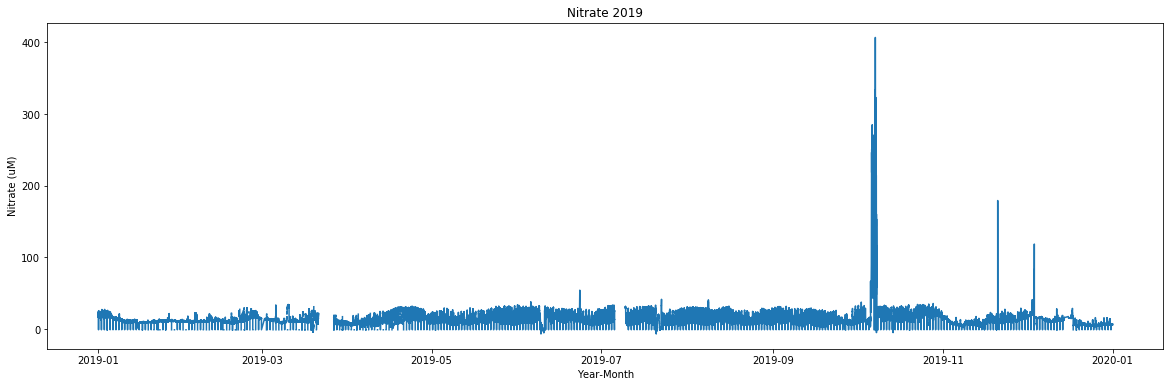

In [33]:
#Nitrate 2019
plt.figure(figsize=(20,6))
plt.plot(df19.index,df19['nitrate'])
plt.title('Nitrate 2019')
plt.ylabel('Nitrate (uM)')
plt.xlabel('Year-Month')

In [34]:
newsub=df19['nitrate'][df19['nitrate']>0]

In [35]:
newsub_nitrate=newsub['2019-06-12':'2019-06-20']

In [36]:
nitrate_2019_subset=df19['nitrate'] 

In [37]:
temperature_2019_subset=df19['temp']

In [38]:
newsub=dates_applied_good_nitrate_2019_subset
newsubtemp=temperature_2019_subset['2019-06-12':'2019-06-20']

In [39]:
# newsub=nitrate_good_sub['2019-06-12':'2019-06-20']
# newsubtemp=temperature_2019_subset['2019-06-12':'2019-06-20']

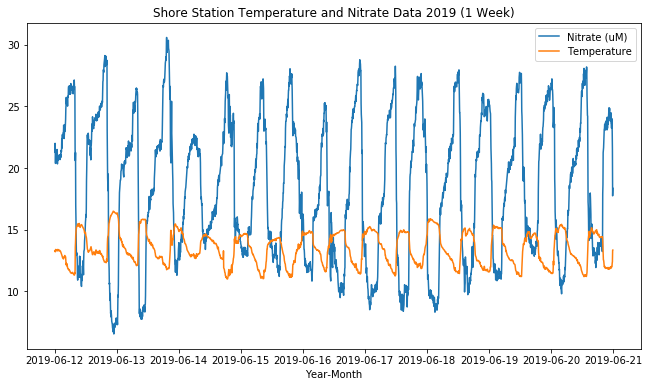

In [40]:
plt.figure(figsize=(11,6))
plt.plot(newsub_nitrate)
plt.plot(newsubtemp)
plt.title('Shore Station Temperature and Nitrate Data 2019 (1 Week)')
plt.xlabel('Year-Month')
plt.legend(["Nitrate (uM)", "Temperature"])

In [41]:
# #Temp 2019
# plt.figure(figsize=(10,6))
# plt.plot(subset_2019_June_December_AGU['temp'], label="Temperature")
# plt.plot(nitrate_subset_2019_June_December_AGU['nitrate'], label="Nitrate")
# plt.legend(loc="upper left")
# plt.title('Shore Station Temperature and Nitrate Data 2019 (1 Week)')
# plt.xlabel('Year-Month')
# ax.legend([line 1, line 2], ['Temperature ($^\circ$C)'], ['Nitrate (uM)'])


*Creating a good set of data for the whole 2016 year with flags=1 (1 being represenative of a quality flag indicating data that has no problems based on processed quality contol data for the Shore House*

In [42]:
#Without .dropna () and took out (df['nitrate_flg'] == 1) & because of no nitrate sensor in 2016

In [43]:
ii_df16=np.array((df16['temp_flg'] == 1) & (df16['sal_flg'] == 1) & (df16['fluor_flg'] == 1) & (df16['ph_flg'] == 1) & (df16['do2_flg'] == 1))

In [44]:
temp_df16= np.array(df16['temp'][ii_df16])
#nitrate_df16 = np.array(df16['nitrate'][ii_df16])
sal_df16= np.array(df16['sal'][ii_df16])
fluor_df16= np.array(df16['fluor'][ii_df16])
pH_df16= np.array(df16['ph'][ii_df16])
do2_df16= np.array(df16['do2'][ii_df16])

*In order for PCA to run, the shape for all variables selected for the analysis must be the same*

In [45]:
#Shape:(64518,)
# np.shape(temp_df16)
# np.shape(sal_df16)
# np.shape(fluor_df16)
# np.shape(pH_df16)
# np.shape(do2_df16)

*Creating a good set of data for the whole 2017 year with flags=1 (1 being represenative of a quality flag indicating data that has no problems based on processed quality contol data for the Shore House*

In [46]:
#Without .dropna () and took out (df['nitrate_flg'] == 1) & because of no nitrate sensor in 2017

In [47]:
ii_df17=np.array((df17['temp_flg'] == 1) & (df17['sal_flg'] == 1) & (df17['fluor_flg'] == 1) & (df17['ph_flg'] == 1) & (df17['do2_flg'] == 1))

In [48]:
temp_df17= np.array(df17['temp'][ii_df17])
# nitrate_df17= np.array(df17['nitrate'][ii_df17])
sal_df17= np.array(df17['sal'][ii_df17])
fluor_df17= np.array(df17['fluor'][ii_df17])
pH_df17= np.array(df17['ph'][ii_df17])
do2_df17= np.array(df17['do2'][ii_df17])

*In order for PCA to run, the shape for all variables selected for the analysis must be the same*

In [49]:
#Shape:(21424,)
#np.shape(temp_df17)
#np.shape(sal_df17)
#np.shape(fluor_df17)
#np.shape(pH_df17)
#np.shape(do2_df17)

*Creating a good set of data for the whole 2018 year with flags=1 (1 being represenative of a quality flag indicating data that has no problems based on processed quality contol data for the Shore House*

In [50]:
#Array is all False

In [51]:
ii_df18=np.array((df18['temp_flg'] == 1) & (df18['sal_flg'] == 1) & (df18['fluor_flg'] == 1) & (df18['ph_flg'] == 1) & (df18['nitrate_flg'] == 1) & (df18['do2_flg'] == 1))

In [52]:
temp_df18= np.array(df18['temp'][ii_df18])
nitrate_df18= np.array(df18['nitrate'][ii_df18])
sal_df18= np.array(df18['sal'][ii_df18])
fluor_df18= np.array(df18['fluor'][ii_df18])
pH_df18= np.array(df18['ph'][ii_df18])
do2_df18= np.array(df18['do2'][ii_df18])

In [53]:
#(0,)
# np.shape(temp_df18)
#np.shape(sal_df18)
# np.shape(fluor_df18)
# np.shape(pH_df18)
# np.shape(do2_df18)

*Creating a good set of data for the whole 2019 year with flags=1 (1 being represenative of a quality flag indicating data that has no problems based on processed quality contol data for the Shore House*

In [54]:
ii_df19=np.array((df19['temp_flg'] == 1) & (df19['sal_flg'] == 1) & (df19['fluor_flg'] == 1) & (df19['ph_flg'] == 1) & (df19['nitrate_flg'] == 1) & (df19['do2_flg'] == 1))

In [55]:
temp_df19= np.array(df19['temp'][ii_df19])
nitrate_df19= np.array(df19['nitrate'][ii_df19])
sal_df19= np.array(df19['sal'][ii_df19])
fluor_df19= np.array(df19['fluor'][ii_df19])
pH_df19= np.array(df19['ph'][ii_df19])
do2_df19= np.array(df19['do2'][ii_df19])

*In order for PCA to run, the shape for all variables selected for the analysis must be the same*

In [56]:
#Shape:(30220,)
#np.shape(temp_df19)
#np.shape(sal_df19)
#np.shape(fluor_df19)
#np.shape(pH_df19)
#np.shape(do2_df19)

*Creating a good set of data for the whole 2021 year with flags=1 (1 being represenative of a quality flag indicating data that has no problems based on processed quality contol data for the Shore House*

In [57]:
ii_df21=np.array((df21['temp_flg'] == 1) & (df21['sal_flg'] == 1) & (df21['fluor_flg'] == 1) & (df21['ph_flg'] == 1) & (df21['do2_flg'] == 1) & (df21['nitrate_flg'] ==1))

In [58]:
temp_df21= np.array(df21['temp'][ii_df21])
nitrate_df21= np.array(df21['nitrate'][ii_df21])
sal_df21= np.array(df21['sal'][ii_df21])
fluor_df21= np.array(df21['fluor'][ii_df21])
pH_df21= np.array(df21['ph'][ii_df21])
do2_df21= np.array(df21['do2'][ii_df21])

### PCA Step 1: data matrix

*Creating a new data frame with good flag data, and creating a data matrix that standardizes the data*

*Note:Results of PCA depend on the scales at which the variables are measured. Variables with the highest sampling variance will tend to be emphasized in the first few principal component's. PCA using the covaiance function

In [59]:
PCA_df16 = pd.DataFrame(temp_df16, columns=['temp'])
#PCA_df16['nitrate'] = nitrate_df16.tolist()
PCA_df16['sal'] = sal_df16.tolist()
PCA_df16['fluor'] = fluor_df16.tolist()
PCA_df16['pH'] = pH_df16.tolist()
PCA_df16['do2'] = do2_df16.tolist()

In [60]:
PCA_df16

,temp,sal,fluor,pH,do2
0,14.352496,32.948777,0.268737,8.000960,302.52
1,14.357766,32.944286,0.275086,8.000960,293.98
2,14.355508,32.944285,0.275086,8.000960,305.25
3,14.354002,32.940718,0.268737,8.005254,301.00
4,14.362283,32.932735,0.268737,8.005254,299.99
...,...,...,...,...,...
64513,12.119312,33.103501,1.417943,7.728100,222.70
64514,12.130182,33.105019,1.392546,7.732494,213.79
64515,12.141050,33.102481,1.392546,7.732494,212.89
64516,12.163556,33.095713,1.411594,7.688557,215.24


Length of values does not match length of index for everything 

In [61]:
PCA_df17 = pd.DataFrame(temp_df17, columns=['temp'])
# PCA_df17['nitrate'] = nitrate_df17.tolist()
PCA_df17['sal'] = sal_df17.tolist()
PCA_df17['fluor'] = fluor_df17.tolist()
PCA_df17['pH'] = pH_df17.tolist()
PCA_df17['do2'] = do2_df17.tolist()

In [62]:
PCA_df17

,temp,sal,fluor,pH,do2
0,10.147273,33.601426,0.179848,7.644880,94.60
1,10.138438,33.599914,0.179848,7.644880,94.70
2,10.275254,33.573990,0.179848,7.663792,111.31
3,10.680617,33.495624,0.179848,7.692160,146.71
4,11.142945,33.452949,0.186197,7.720528,178.81
...,...,...,...,...,...
21419,13.313798,32.923509,5.521608,7.789872,173.88
21420,13.338307,32.917195,5.444441,7.786720,176.19
21421,13.318024,32.920847,5.444441,7.783568,176.34
21422,13.305344,32.923821,5.425149,7.786720,174.66


In [63]:
#Successful, but no data in data frame 

In [64]:
PCA_df18 = pd.DataFrame(temp_df18, columns=['temp'])
#PCA_df18['nitrate'] = nitrate_df18.tolist()
PCA_df18['sal'] = sal_df18.tolist()
PCA_df18['fluor'] = fluor_df18.tolist()
PCA_df18['pH'] = pH_df18.tolist()
PCA_df18['do2'] = do2_df18.tolist()

In [65]:
PCA_df18

,temp,sal,fluor,pH,do2


In [66]:
#Successful

In [67]:
PCA_df19 = pd.DataFrame(temp_df19, columns=['temp'])
PCA_df19['nitrate'] = nitrate_df19.tolist()
PCA_df19['sal'] = sal_df19.tolist()
PCA_df19['fluor'] = fluor_df19.tolist()
PCA_df19['pH'] = pH_df19.tolist()
PCA_df19['do2'] = do2_df19.tolist()

In [68]:
PCA_df19

,temp,nitrate,sal,fluor,pH,do2
0,12.506247,18.93,33.233143,2.087664,7.820086,188.51
1,12.707787,19.62,33.230927,2.203415,7.640237,187.98
2,12.434932,19.36,33.234306,2.319166,7.679579,188.36
3,12.415158,19.03,33.231456,2.386687,7.831327,185.56
4,12.409139,19.57,33.231902,2.396333,7.820086,186.36
...,...,...,...,...,...,...
30215,13.675158,6.85,32.854697,0.843342,7.996500,298.18
30216,13.620196,7.06,32.863286,0.872280,7.987500,299.19
30217,13.706426,6.68,32.862614,0.833696,7.987500,268.10
30218,13.604969,6.94,32.882943,0.852988,7.978500,260.44


In [69]:
# standardizing data. 
# For each column, subtract the mean and divide by the standard deviation. 
# This should transform each column into a standardized variable with a mean of 0 and a standard deviation of 1.

In [70]:
# env_data_norm= (env_data - np.mean(env_data, axis=0))/np.std(env_data, axis=0, ddof=1)


# col_mean = np.mean(env_data, axis=0) #axis=0, rows is axis 0 and column is axis=1. 
# col_mean #mean of each column 
# env_data-col_mean

In [71]:
PCA_df21 = pd.DataFrame(temp_df21, columns=['temp'])
PCA_df21['nitrate'] = nitrate_df21.tolist()
PCA_df21['sal'] = sal_df21.tolist()
PCA_df21['fluor'] = fluor_df21.tolist()
PCA_df21['pH'] = pH_df21.tolist()
PCA_df21['do2'] = do2_df21.tolist()

In [72]:
PCA_df21

,temp,nitrate,sal,fluor,pH,do2
0,12.623983,11.02,33.120840,7.344685,7.7670,269.33
1,12.627052,10.75,33.118129,7.363977,7.7670,269.15
2,12.620147,9.97,33.117203,7.363977,7.7760,271.28
3,12.645462,9.10,33.111905,7.383269,7.7760,269.07
4,12.654665,9.68,33.106791,7.392915,7.7715,271.31
...,...,...,...,...,...,...
16934,11.154231,15.81,33.628876,11.608177,8.0460,248.18
16935,11.142480,15.82,33.627171,11.608177,8.0460,247.96
16936,11.133079,15.71,33.629557,11.598531,8.0415,246.29
16937,11.132295,16.63,33.628193,11.579239,8.0415,245.47


## PCA Step 2: correlation (or covariance) matrix
Creating the correlation matrix with the standardized data.

*Note:Results of PCA depend on the scales at which the variables are measured. Variables with the highest sampling variance will tend to be emphasized in the first few principal component's. PCA using the covariance function should only be considered if all variables have the same units of measurement. So therefore, below we standardize our data to make sure each variable in the PCA has equal weight to avoid this issue.


In [73]:
R_16 = np.corrcoef(PCA_df16, rowvar=False) 

In [74]:
R_17 = np.corrcoef(PCA_df17, rowvar=False) 

In [75]:
R_18 = np.corrcoef(PCA_df18, rowvar=False) 

/Users/marisolfigueroa/opt/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/marisolfigueroa/opt/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/marisolfigueroa/opt/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/marisolfigueroa/opt/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/marisolfigueroa/opt/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [76]:
R_19 = np.corrcoef(PCA_df19, rowvar=False) 

In [77]:
R_21 = np.corrcoef(PCA_df21, rowvar=False) 

## PCA Step 3: covariance (or correlation) matrix

$ RV = V\Lambda $

The eigenvalues are in the matrix $\Lambda$ 

The eigenvectors are in the matrix $V$

In [78]:
val16, vec16 = linalg.eig(R_16)

In [79]:
 val17, vec17 = linalg.eig(R_17) #expected square matrix 

In [80]:
# val, vec = linalg.eig(R_18) #array must not contain infs or NaNs

In [81]:
val19, vec19 = linalg.eig(R_19)

In [82]:
val21, vec21 = linalg.eig(R_21)

In [83]:
######################################################################################

In [84]:
#2016

In [85]:
PCA_df16

,temp,sal,fluor,pH,do2
0,14.352496,32.948777,0.268737,8.000960,302.52
1,14.357766,32.944286,0.275086,8.000960,293.98
2,14.355508,32.944285,0.275086,8.000960,305.25
3,14.354002,32.940718,0.268737,8.005254,301.00
4,14.362283,32.932735,0.268737,8.005254,299.99
...,...,...,...,...,...
64513,12.119312,33.103501,1.417943,7.728100,222.70
64514,12.130182,33.105019,1.392546,7.732494,213.79
64515,12.141050,33.102481,1.392546,7.732494,212.89
64516,12.163556,33.095713,1.411594,7.688557,215.24


In [86]:
vec16

array([[ 0.52456847, -0.06213983, -0.79480223,  0.29854443, -0.01127858],
       [-0.45090043,  0.09383893, -0.20474996,  0.2973403 ,  0.81089411],
       [ 0.16187424, -0.93731522,  0.20045513,  0.06268296,  0.22610946],
       [ 0.49184291,  0.17410052,  0.04876117, -0.67871991,  0.51453007],
       [ 0.5033925 ,  0.28011083,  0.53273536,  0.59822245,  0.16265563]])

In [87]:
val16 = np.real(val16)

In [88]:
np.real(val16)
np.sum(val16)

5.0

In [89]:
pctvar16 = val16/np.sum(val16)*100

In [90]:
pctvar16

array([64.74104807, 20.12787647,  2.9721999 ,  2.5643737 ,  9.59450185])

In [91]:
A16 = np.dot(vec16, np.diag(val16**.5))

In [92]:
A16

array([[ 0.94379365, -0.06233816, -0.306396  ,  0.1069017 , -0.00781179],
       [-0.8112515 ,  0.09413845, -0.07893104,  0.10647053,  0.56164302],
       [ 0.29124106, -0.94030696,  0.07727539,  0.02244529,  0.15660836],
       [ 0.88491444,  0.17465622,  0.01879742, -0.24303356,  0.35637479],
       [ 0.90569424,  0.28100489,  0.20536931,  0.21420932,  0.11265885]])

In [93]:
print('PC1 loading')
print(A16[:,0])
print('temp', 'sal', 'fluor', 'pH', 'do2')

PC1 loading
[ 0.94379365 -0.8112515   0.29124106  0.88491444  0.90569424]
temp sal fluor pH do2


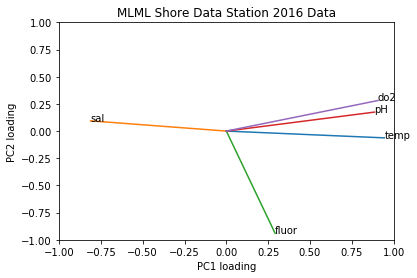

In [94]:
plt.figure
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.title('MLML Shore Data Station 2016 Data')
plt.xlabel('PC1 loading')
plt.ylabel('PC2 loading')

variables = ['temp', 'sal', 'fluor', 'pH', 'do2']
for i, txt in enumerate (variables):
    plt.plot ([0,A16[i,0]], [0, A16[i,1]], '-')
    plt.text(A16[i,0], A16[i,1], txt)

In [108]:
###########################################################################################

In [109]:
#2017

In [110]:
PCA_df17

,temp,sal,fluor,pH,do2
0,10.147273,33.601426,0.179848,7.644880,94.60
1,10.138438,33.599914,0.179848,7.644880,94.70
2,10.275254,33.573990,0.179848,7.663792,111.31
3,10.680617,33.495624,0.179848,7.692160,146.71
4,11.142945,33.452949,0.186197,7.720528,178.81
...,...,...,...,...,...
21419,13.313798,32.923509,5.521608,7.789872,173.88
21420,13.338307,32.917195,5.444441,7.786720,176.19
21421,13.318024,32.920847,5.444441,7.783568,176.34
21422,13.305344,32.923821,5.425149,7.786720,174.66


In [111]:
val17, vec17 = linalg.eig(R_17) #works

In [112]:
vec17

array([[ 0.56217787, -0.05255871, -0.13985244, -0.80850241, -0.089212  ],
       [-0.30608904,  0.58920195,  0.64868503, -0.34920789, -0.1281099 ],
       [ 0.19867819, -0.65394716,  0.72582182,  0.04837597,  0.06101263],
       [ 0.54373186,  0.25854052,  0.11288458,  0.41590777, -0.67215345],
       [ 0.50512196,  0.39444715,  0.14173491,  0.22149087,  0.72119087]])

In [113]:
val17=np.real(val17)

In [114]:
val17

array([2.92733347, 1.3853278 , 0.55360157, 0.09154931, 0.04218785])

In [115]:
np.real(val17)
np.sum(val17)

5.000000000000002

In [116]:
pctvar17 = val17/np.sum(val17)*100
pctvar17

array([58.54666938, 27.70655594, 11.07203136,  1.83098625,  0.84375708])

In [117]:
A17 = np.dot(vec17, np.diag(val17**.5))
A17

array([[ 0.96185553, -0.06186157, -0.10405638, -0.24462952, -0.01832386],
       [-0.52370157,  0.6934904 ,  0.48265024, -0.10566024, -0.02631337],
       [ 0.33992749, -0.76969547,  0.54004342,  0.01463717,  0.0125318 ],
       [ 0.93029541,  0.30430206,  0.0839911 ,  0.1258417 , -0.13805818],
       [ 0.86423598,  0.46426409,  0.10545702,  0.06701675,  0.14813031]])

In [118]:
print('PC1 loading')
print(A17[:,0])
print('temp', 'sal', 'fluor', 'pH', 'do2')

PC1 loading
[ 0.96185553 -0.52370157  0.33992749  0.93029541  0.86423598]
temp sal fluor pH do2


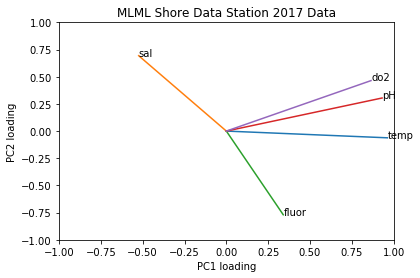

In [119]:
plt.figure
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.title('MLML Shore Data Station 2017 Data')
plt.xlabel('PC1 loading')
plt.ylabel('PC2 loading')

variables = ['temp', 'sal', 'fluor', 'pH', 'do2']
for i, txt in enumerate (variables):
    plt.plot ([0,A17[i,0]], [0, A17[i,1]], '-')
    plt.text(A17[i,0], A17[i,1], txt)

In [132]:
#2018 data does no work for some reason. fix it. 

In [133]:
##############################################################################################

In [134]:
#2019

In [135]:
PCA_df19

,temp,nitrate,sal,fluor,pH,do2
0,12.506247,18.93,33.233143,2.087664,7.820086,188.51
1,12.707787,19.62,33.230927,2.203415,7.640237,187.98
2,12.434932,19.36,33.234306,2.319166,7.679579,188.36
3,12.415158,19.03,33.231456,2.386687,7.831327,185.56
4,12.409139,19.57,33.231902,2.396333,7.820086,186.36
...,...,...,...,...,...,...
30215,13.675158,6.85,32.854697,0.843342,7.996500,298.18
30216,13.620196,7.06,32.863286,0.872280,7.987500,299.19
30217,13.706426,6.68,32.862614,0.833696,7.987500,268.10
30218,13.604969,6.94,32.882943,0.852988,7.978500,260.44


In [136]:
val19, vec19 = linalg.eig(R_19)

In [137]:
vec19

array([[ 0.40845318, -0.19887049, -0.13263752, -0.18414848, -0.84655448,
        -0.15955771],
       [-0.55126825,  0.01381513, -0.77429257, -0.24137519, -0.06041083,
        -0.18566643],
       [-0.43337076,  0.34165681,  0.24253245,  0.59975493, -0.39155215,
        -0.35159544],
       [ 0.05220303, -0.71709637, -0.01042235,  0.26604805,  0.24894144,
        -0.59176482],
       [ 0.27378379,  0.5105436 ,  0.08143102, -0.38669785,  0.21181857,
        -0.68070135],
       [ 0.51359164,  0.26200824, -0.56330868,  0.57254221,  0.13979988,
         0.05394475]])

In [138]:
val19

array([2.85351054+0.j, 1.24471673+0.j, 0.13887131+0.j, 0.31532145+0.j,
       0.61447158+0.j, 0.83310838+0.j])

In [139]:
val19=np.real(val19)

In [140]:
np.real(val19)

array([2.85351054, 1.24471673, 0.13887131, 0.31532145, 0.61447158,
       0.83310838])

In [141]:
np.sum(val19)

5.9999999999999964

In [142]:
pctvar19=val19/np.sum(val19)*100

In [143]:
pctvar19

array([47.55850907, 20.74527888,  2.31452189,  5.25535746, 10.241193  ,
       13.88513971])

In [144]:
A19 = np.dot(vec19, np.diag(val19**.5))

In [145]:
A19

array([[ 0.68997289, -0.22187359, -0.04942796, -0.1034058 , -0.66359914,
        -0.14563593],
       [-0.93122091,  0.0154131 , -0.28854355, -0.13554059, -0.04735499,
        -0.16946661],
       [-0.73206451,  0.38117582,  0.09038079,  0.33678333, -0.30693083,
        -0.32091793],
       [ 0.08818312, -0.80004201, -0.00388394,  0.14939527,  0.19514081,
        -0.54013198],
       [ 0.46248481,  0.56959753,  0.03034563, -0.21714434,  0.16604085,
        -0.6213086 ],
       [ 0.86757632,  0.29231441, -0.20991947,  0.32150244,  0.10958667,
         0.04923795]])

In [146]:
print('PC1 loading')
print(A19[:,0])
print('temp', 'nitrate', 'sal', 'fluor', 'pH', 'do2')

PC1 loading
[ 0.68997289 -0.93122091 -0.73206451  0.08818312  0.46248481  0.86757632]
temp nitrate sal fluor pH do2


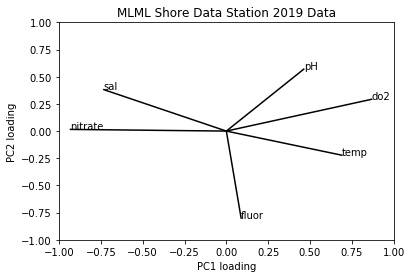

In [147]:
plt.figure
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.title('MLML Shore Data Station 2019 Data')
plt.xlabel('PC1 loading')
plt.ylabel('PC2 loading')

variables = ['temp','nitrate','sal','fluor','pH', 'do2']
for i, txt in enumerate (variables):
    plt.plot ([0,A19[i,0]], [0, A19[i,1]], 'k-')
    plt.text(A19[i,0], A19[i,1], txt)

In [161]:
#2021##

In [162]:
val21, vec21= linalg.eig(R_21)

In [163]:
vec21

array([[ 0.46625954, -0.28016289,  0.03330837, -0.76836673,  0.29515738,
         0.15967478],
       [-0.49414129, -0.12703237, -0.16884847, -0.42516915, -0.62762073,
         0.36946011],
       [-0.45200702,  0.44551069,  0.01338151, -0.10601015,  0.6077669 ,
         0.4652011 ],
       [-0.14784086, -0.10696694,  0.97855211, -0.03370556, -0.08350504,
         0.03205875],
       [ 0.23714035,  0.82615698,  0.096999  , -0.31964251, -0.30417885,
        -0.23900667],
       [ 0.50598775,  0.11364189,  0.05682115,  0.33808019, -0.22382109,
         0.75062586]])

In [164]:
val21 = np.real(val21)

In [165]:
np.real(val21)
np.sum(val21)

5.999999999999999

In [166]:
pctvar = val21/np.sum(val21)*100

In [167]:
pctvar

array([56.19007405, 18.32621498, 15.87639699,  4.57842086,  2.65715398,
        2.37173914])

In [168]:
A = np.dot(vec21, np.diag(val21**.5))

In [169]:
A

array([[ 0.85611708, -0.29378027,  0.0325091 , -0.40271892,  0.11785218,
         0.06023451],
       [-0.90731183, -0.13320681, -0.16479678, -0.22284107, -0.25060011,
         0.13937236],
       [-0.82994748,  0.46716483,  0.01306041, -0.05556239,  0.24267276,
         0.17548897],
       [-0.2714563 , -0.11216609,  0.95507078, -0.01766587, -0.03334239,
         0.0120936 ],
       [ 0.43542252,  0.86631252,  0.09467141, -0.16753209, -0.12145433,
        -0.09016108],
       [ 0.92906357,  0.11916547,  0.05545767,  0.17719571, -0.08936861,
         0.28316046]])

In [170]:
print('PC1 loading')
print(A[:,0])
print('temp', 'nitrate', 'sal', 'fluor', 'pH', 'do2')

PC1 loading
[ 0.85611708 -0.90731183 -0.82994748 -0.2714563   0.43542252  0.92906357]
temp nitrate sal fluor pH do2


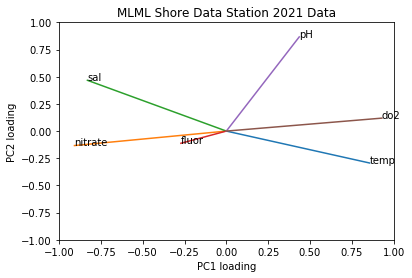

In [171]:
plt.figure
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.title('MLML Shore Data Station 2021 Data')
plt.xlabel('PC1 loading')
plt.ylabel('PC2 loading')

variables = ['temp', 'nitrate', 'sal', 'fluor', 'pH', 'do2']
for i, txt in enumerate (variables):
    plt.plot ([0,A[i,0]], [0, A[i,1]], '-')
    plt.text(A[i,0], A[i,1], txt)

Temp for some reason 'is not defined' even though it is defined in the cell above

In [187]:
np.std(u)**2 #variance

6.0022381546384125

In [188]:
R = np.corrcoef(u,v)
R

array([[ 1.        , -0.20043077],
       [-0.20043077,  1.        ]])

The columns of the eigenvector matrix are the principal components. 
The principal components define the axes of the new rotated variables. 
The eigenvalues describe the variance of the each principal component.

In [189]:
val,vec = np.linalg.eig(C)

In [190]:
val #variance along new axes

array([6.10569371, 1.72954375])

In [191]:
vec #orientation of new axes

array([[ 0.98811043,  0.15374585],
       [-0.15374585,  0.98811043]])

In [192]:
sorti = np.argsort(val)[::-1]
val_sorted = val[sorti]
vec_sorted = vec[:,sorti]

In [193]:
val_sorted #highest eigen values is first. highest variance first 

array([6.10569371, 1.72954375])

In [194]:
vec_sorted #sorted these in the same way

array([[ 0.98811043,  0.15374585],
       [-0.15374585,  0.98811043]])

In [195]:
#Computing the percentage of variance accounted for by each principal component.

In [196]:
pct_var = val_sorted/np.sum(val_sorted)*100

In [197]:
pct_var

array([77.92608385, 22.07391615])

In [198]:
#Creating  Λ  and  𝑉  matrices from eigenvalues and eigenvectors.

In [199]:
LAMBDA = np.diag(val_sorted)
LAMBDA 

array([[6.10569371, 0.        ],
       [0.        , 1.72954375]])

In [200]:
V = vec_sorted
V

array([[ 0.98811043,  0.15374585],
       [-0.15374585,  0.98811043]])

In [201]:
#The columns of the eigenvector matrix are the principal components. 
#The principal components define the axes of the new rotated variables.


In [202]:
PC1 = V[:,0]
PC2 = V[:,1]

In [203]:
PC1

array([ 0.98811043, -0.15374585])

In [204]:
PC2

array([0.15374585, 0.98811043])